# Análisis de las Desviaciones en Tiempo y Costo para Proyectos de Vías Rurales en Colombia

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. Framework general


![](images/detailed-research-method.png)

# 2. Definition of target projects and data collection (ETL)

La adquisición y procesamiento de los datos se realiza siguiendo el proceso ETL:
- __Extract:__ definición de los contratos objeto de estudio y adquisición de los datos de dichos proyectos de la base de datos SECOP I.
- __Transform:__ cálculo, estandarización y limpieza de los atributos de los contratos seleccionados.
- __Load:__ transformación de los datos extraídos y consolidación en una tabla maestra, la cual es insumo de los análisis posteriores.

![](images/ETL.png)

__Sistema Electrónico de Compra Pública__

Los datos para el estudio se obtuvieron de la base de datos del _Sistema Electrónico de Compra Pública -SECOP-_. Este sistema es administrado por Colombia Compra Eficiente -CCE-, que es la Agencia de Contratación Pública del Gobierno de Colombia. Para el registro y gestión de los procesos de contratación se tienen dos sistemas: SECOP I y SECOP II. El primero, es la versión más antigua del sistema y se utiliza solo para el registro de los contratos. La segunda, es un sistema transaccional en el cual no solo se registran los contratos, si no, que se llevan a cabo procesos de adjudicación, subastas, entre otros. 

Para este estudio se tomó la base de datos SECOP I, la cual está compuesta de una serie de tablas que contienen información de los procesos de contratación, las adiciones de los contratos, los planes anuales de adquisición de las entidades, las multas y sanciones y los oferentes de los procesos. Para la investigación se tomó la tabla de Procesos de Contratación. Esta tabla contiene un total de 73 atributos del contrato lo cual incluye información de:

- La entidad pública (nit, nombre, nivel, orden, ubicación)
- El proceso de contratación (régimen, tipo de proceso, estado, ID)
- El objeto del contrato (tipo de contrato, objeto, clasificación del objeto según el catálogo UNSPSC)
- Valor del contrato (valor del proceso, valor de contrato, adiciones, moneda)
- Fecha y plazos (cargue en SECOP, firma, inicio, finalización, plazo en días o meses, adiciones en obra)
- Contratista (ID, razon social, representante legal, ubicación)
- Otros 

## 2.1 Adquisición de datos (Extract)

El proceso de adquisición de los datos del SECOP I se divide en dos partes:

- _Extracción de datos estructurados:_ se realiza a través de una consulta donde se aplican filtros que permiten seleccionar los contratos (filas) y atributos (columnas) que son parte del objeto de estudio.
- _Extracción de datos no estructurados:_ con el inventario de contratos seleccionados en la extracción de datos estructurados se realiza una búsqueda de información de interés que se encuentra contenida en la documentación de los contratos.

A continuación, se describe con mayor detalle cada una de estos pasos.

### 2.1.1 Adquisición de datos estructurados
 
Los datos estructurados se extrajeron principalmente de la base de datos de procesos de contratación en donde se encuentran almacenadas las variables del contrato que son objeto de la investigación. A continuación, se describen los criterios utilizados para la selección de los atributos y los contratos:
 
__Selección de atributos (columnas)__
 
En función de las preguntas de investigación se seleccionan los atributos del contratos que se desean analizar:
 
- Información de la entidad: nombre de la entidad, orden y nivel de entidad, ubicación geográfica (departamento y municipio).
- Proceso de contratación: régimen y tipo de proceso de contratación
- Objeto del contrato: clasificación del objeto y detalle del objeto
- Valor del contrato: cuantía del proceso, cuantía del contrato, adiciones en la cuantía y valor total con adiciones
- Fechas y Plazos del contrato: fecha de firma, fecha de inicio y finalización, plazo de ejecución y adiciones en tiempo
 
__Selección de contratos (filas)__
 
Teniendo en cuenta que la investigación está enfocada en vías rurales, a continuación se listan los filtros aplicados a los datos:
 
- Fecha de firma del contrato: entre 2014 hasta febrero de 2020
- Tipo de contrato: obra, código de la familia = 9511 (según clasificación UNSPSC)
- Cuantía del proceso y del contrato: >= $20.000.000
- Régimen de contratación: se excluyen contratos de régimen especial
- Tipo de proceso: se incluyeron sólo procesos competitivos (solo licitaciones)
- Estado del contrato: se incluyen solo contratos terminados y liquidados
- Objeto del contrato: se excluyen los contratos cuyo objeto incluye terminos como: suministro de mezcla asfáltica; señalización horizontal; construcción de reductores de velocidad, barandas, muros de contención; demolición; restauración estación férrea; señalización; rehabilitación y conservación puente; mantenimiento túnel; alcantarilla; mano de obra; Box culvert; puentes colgantes; casco urbano; vías urbanas; ejercito; semaforización; demoliciones; muro; ciclovias o cicloruta; residuos sólidos; desmonte y limpieza; y aulas.

### 2.1.2 Adquisición de datos no estructurados

Gran parte de la información de la planeación del contrato, el diseño del proceso y la evaluación de oferentes no se encuentra estructutara y almacenada en tablas de metadadatos. Por esta razon, a partir de los contrato seleccionados se realizó una busqueda manual de la inforamción en documentos como: pliegos, informes de evaluación, contratos y documentos de modificación del contrato. A continuación, se listan las variables extraidas de estos documentos. 

For the project initiation phase, two variables:

- Time studies contract
- IDI: Integral performance index for municipalities

For the project planning phase, seventeen new variables related to the contractual process:

- Advanced payment
- Experience
- Contracting capacity
- Liquidity index
- Debt index
- Interest coverage ratio 
- ROE
- ROA
- Working capital
- Net equity
- Number of bidders

This phase also included four additional variables related to the qualification of the bidders, consisting of the percentage assigned to each of the four aspects allowed by Colombian law (Decreto 1510 de 2013 - EVA - Función Pública, 2013):

- Technical score
- Price score
- National industry score
- Other score

This phase included two additional variables considering the category for which the highest and the lowest scores were assigned in the bidding:

- Lowest score
- Highest score

Finally, the project execution adds one new variable:
- Time suspended.

In [46]:
# Extraer datos del SECOP
from ETL import extract_data, process_data

In [47]:
raw_data = extract_data()
raw_data.head()

El numero de contratos extraidos: 720


,uid,nombre_de_la_entidad,departamento_entidad,orden_entidad,tipo_de_proceso,objeto_a_contratar,detalle_objeto,cuantia_proceso,cuantia_contrato,valor_total_de_adiciones,valor_contrato_con_adiciones,anno_firma,fecha_fima,fecha_ini_ejec_contrato,plazo_de_ejec_del_contrato,rango_de_ejec_del_contrato,tiempo_adiciones_en_dias,tiempo_adiciones_en_meses,fecha_fin_ejec_contrato
0,15-1-1488216430156,VALLE DEL CAUCA ALCALDÍA MUNICIPIO DE LA UNIÓN,Valle del Cauca,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,Licitación Pública,"Terrenos, Edificios, Estructuras y Vías",CONSTRUCCION DE PAVIMENTO RIGIDO EN LA CL 13 C...,285341776,285151179,0,285151179,2015,2015-11-18,2015-12-14,60,D,30,0,2016-03-13 00:00:00
1,15-1-1445654095917,ANTIOQUIA ALCALDÍA MUNICIPIO DE MEDELLÍN,Antioquia,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 2,Licitación Pública,"Terrenos, Edificios, Estructuras y Vías",CONFORMACIÓN PARCHEO PAVIMENTACIÓN REPAVIMENTA...,1779588615,1750717720,0,1750717720,2015,2015-10-09,2015-11-03,3,M,0,0,2016-02-03 00:00:00
2,18-21-74068240139,CASANARE ALCALDÍA MUNICIPIO DE SABANALARGA,Casanare,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,Licitación obra pública,"Terrenos, Edificios, Estructuras y Vías",REALIZAR LA CONSTRUCCIÓN DE OBRAS DE DRENAJE Y...,279116919,279010379,44271346,323281725,2019,2019-02-01,2019-02-01,4,M,15,0,2019-06-01 00:00:00
3,17-1-1792116571655,CAQUETÁ ALCALDÍA MUNICIPIO DE CARTAGENA DEL C...,Caquetá,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,Licitación Pública,"Terrenos, Edificios, Estructuras y Vías",EJECUCION DEL PROGRAMA DE RED DE VIAS TERCIARI...,878217589,878217589,0,878217589,2017,2017-10-18,2017-10-20,2,M,248,0,2018-08-20 00:00:00
4,15-1-1398693847921,BOYACÁ ALCALDÍA MUNICIPIO DE CHIQUINQUIRÁ,Boyacá,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,Licitación Pública,"Terrenos, Edificios, Estructuras y Vías",MANTENIMIENTO Y REPARCHEO DE VÍAS DEL PERÍMETR...,360000000,359948173,179897140,539845313,2015,2015-07-22,2015-07-24,90,D,0,0,2015-10-22 00:00:00


## 2.2 Transformación, estandarización y limpieza de datos (Transform)
 
Las tareas de transformación, estandarización y limpieza buscan modificar las variables de tal manera que se unifiquen conceptos, corrijan formatos de los datos según el tipo, agrupen categorías de variables nominales, lo cual facilita el análisis y manejo de los datos. En esta parte también se crean variables nuevas con el fin de extraer nueva información y patrones a partir de los datos existentes. A continuación, se describen las tareas aplicadas:
 
### 2.2.1 Transformación y estandarización 

- Plazo del contrato en días: en la base de datos original se puede encontrar el plazo del contrato en días o meses. Para facilitar el análisis se unificó en el plazo en días.
- Escalar el valor de los contratos: para incluir el factor de inflación en los contratos, estos fueron escalados en función del salario mínimo mensual en Colombia -SMMLV- según el año de firma del contrato. Esta transformación se aplicó a la cuantía del proceso, cuantía del contrato, adiciones en la cuantía, valor total con adiciones.
- Estandarizar los formatos de fecha en la estructura año-mes-día (YYYY-MM-DD)
- Estandarizar el orden de la entidad: se asignó una categoría de acuerdo al municipio de la entidad. Esta clasificación la establece el departamento de planeación nacional -DNP- de acuerdo al número de habitantes y sus ingresos.
- Intensidad del proyecto: se crea una variable que relaciona el valor del contrato y la duración.
- Award Growth: se crea variable para estimar la relación entre el valor de la oferta ganadora y el precio base establecido para la licitación.
- Clasificar las entidades por región: de acuerdo al departamento de la entidad fue asignada a una de las cinco regiones de Colombia.
- Suspensión del contrato: se crea un variable que indica la duración de la suspensión del contrato como un porcentaje de la duración estimada.
- Desviación en costo y desviación en tiempo: se crearon dos variables de salida asociadas a las desviaciones en costo y tiempo para cada uno de los contratos. Para esto se utilizaron las siguientes fórmulas:
 
$$
\text{Desviación en costo} = \frac{\text{Valor final del contrato - Valor inicial del contrato}}{\text{Valor inicial del contrato}}
$$
 
$$
\text{Desviación en tiempo} = \frac{\text{Plazo final del contrato - Plazo inicial del contrato}}{\text{Plazo inicial del contrato}}
$$

In [48]:
proc_data = process_data(raw_data)
proc_data.head()

,CONTRACT_ID,ENTITY_NAME,DEPARTMENT,MUNICIPALITY_TYPE,PROCESS_TYPE,CONTRACT_OBJECT,OBJETC_DETAIL,ESTIMATED_COST,CONTRACT_VALUE,ADDITIONAL_COST,FINAL_COST,YEAR,CONTRACT_DATE,START_DATE,ORIGINAL_DEADLINE,END_DATE,ADDITIONAL_TIME,FINAL_DEADLINE,PROJECT_INTENSITY,AWARD_GROWTH,COST_DEVIATION,TIME_DEVIATION,OWNER,REGION
0,15-1-1488216430156,VALLE DEL CAUCA ALCALDÍA MUNICIPIO DE LA UNIÓN,VALLE DEL CAUCA,TYPE_6,LICITACIÓN PÚBLICA,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VÍAS",CONSTRUCCION DE PAVIMENTO RIGIDO EN LA CL 13 C...,442.836620,442.540823,0.000000,442.540823,2015,2015-11-18,2015-12-14,60,2016-03-13,30,90,7.375680,-0.066796,0.000000,0.500000,MUNICIPALITY,PACIFICA
1,15-1-1445654095917,ANTIOQUIA ALCALDÍA MUNICIPIO DE MEDELLÍN,ANTIOQUIA,TYPE_2,LICITACIÓN PÚBLICA,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VÍAS",CONFORMACIÓN PARCHEO PAVIMENTACIÓN REPAVIMENTA...,2761.835361,2717.029130,0.000000,2717.029130,2015,2015-10-09,2015-11-03,90,2016-02-03,0,90,30.189213,-1.622335,0.000000,0.000000,MUNICIPALITY,ANDINA
2,18-21-74068240139,CASANARE ALCALDÍA MUNICIPIO DE SABANALARGA,CASANARE,TYPE_6,LICITACIÓN OBRA PÚBLICA,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VÍAS",REALIZAR LA CONSTRUCCIÓN DE OBRAS DE DRENAJE Y...,337.050509,336.921855,53.460320,390.382175,2019,2019-02-01,2019-02-01,120,2019-06-01,15,135,2.807682,-0.038170,0.158673,0.125000,MUNICIPALITY,ORINOQUIA
3,17-1-1792116571655,CAQUETÁ ALCALDÍA MUNICIPIO DE CARTAGENA DEL C...,CAQUETÁ,TYPE_6,LICITACIÓN PÚBLICA,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VÍAS",EJECUCION DEL PROGRAMA DE RED DE VIAS TERCIARI...,1190.453235,1190.453235,0.000000,1190.453235,2017,2017-10-18,2017-10-20,60,2018-08-20,248,308,19.840887,0.000000,0.000000,4.133333,MUNICIPALITY,AMAZONIA
4,15-1-1398693847921,BOYACÁ ALCALDÍA MUNICIPIO DE CHIQUINQUIRÁ,BOYACÁ,TYPE_6,LICITACIÓN PÚBLICA,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VÍAS",MANTENIMIENTO Y REPARCHEO DE VÍAS DEL PERÍMETR...,558.702568,558.622135,279.191651,837.813786,2015,2015-07-22,2015-07-24,90,2015-10-22,0,90,6.206913,-0.014396,0.499786,0.000000,MUNICIPALITY,ANDINA


### 2.2.2 Limpieza de datos (Reviewing data quality)

Algunas aspectos básicos a revisar para garantizar la calidad de los datos son:
- Duplicados
- Datos faltantes
- Validez y consistencia
    - Consitencia en las fechas: Fecha de terminación < fecha de inicio < fecha de firma
    - Restricciones de ley sobre las adiciones: Desviación en costo debe ser inferior al 50%
    - *Restricciones de ley sobre la duración y valores de los contratos*
- Errores
    - Cuantías y adiciones en valor
    - Plazos y adiciones en tiempo
    - Moneda
    - Objeto
    - Clasificación del contrato

#### Revisar duplicados

In [49]:
# Check duplicates
proc_data.duplicated().sum()

2

In [50]:
# Show all duplicates
proc_data[proc_data.duplicated()]

,CONTRACT_ID,ENTITY_NAME,DEPARTMENT,MUNICIPALITY_TYPE,PROCESS_TYPE,CONTRACT_OBJECT,OBJETC_DETAIL,ESTIMATED_COST,CONTRACT_VALUE,ADDITIONAL_COST,FINAL_COST,YEAR,CONTRACT_DATE,START_DATE,ORIGINAL_DEADLINE,END_DATE,ADDITIONAL_TIME,FINAL_DEADLINE,PROJECT_INTENSITY,AWARD_GROWTH,COST_DEVIATION,TIME_DEVIATION,OWNER,REGION
644,19-21-1495310252385,BOYACÁ ALCALDÍA MUNICIPIO DE COPER,BOYACÁ,TYPE_6,LICITACIÓN OBRA PÚBLICA,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VÍAS",MEJORAMIENTO DE VÍAS CON PAVIMENTO EN ADOQUIN ...,393.718622,438.347251,0.0,438.347251,2020,2020-01-13,2020-02-13,90,2020-05-13,0,90,4.870525,11.335158,0.0,0.0,MUNICIPALITY,ANDINA
652,19-21-131779197268,CUNDINAMARCA ALCALDÍA MUNICIPIO DE MADRID,CUNDINAMARCA,TYPE_5,LICITACIÓN OBRA PÚBLICA,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VÍAS",MEJORAMIENTO DE ANDENES EN EL BARRIO CEREZOS I...,449.278665,449.258100,0.0,449.258100,2019,2019-11-08,2019-11-14,90,2020-02-14,0,90,4.991757,-0.004577,0.0,0.0,MUNICIPALITY,ANDINA


In [51]:
# Drop duplicates
proc_data.drop_duplicates(inplace=True)

#### Datos faltantes

In [52]:
# Check missing values
proc_data.isnull().sum()

CONTRACT_ID          0
ENTITY_NAME          0
DEPARTMENT           0
MUNICIPALITY_TYPE    0
PROCESS_TYPE         0
CONTRACT_OBJECT      0
OBJETC_DETAIL        0
ESTIMATED_COST       0
CONTRACT_VALUE       0
ADDITIONAL_COST      0
FINAL_COST           0
YEAR                 0
CONTRACT_DATE        0
START_DATE           0
ORIGINAL_DEADLINE    0
END_DATE             0
ADDITIONAL_TIME      0
FINAL_DEADLINE       0
PROJECT_INTENSITY    0
AWARD_GROWTH         0
COST_DEVIATION       0
TIME_DEVIATION       0
OWNER                0
REGION               0
dtype: int64

#### Errores en las cuantías

Algunas reglas para verificar errores son:
- Valores atípicos
- Valores altos o bajos en el _AWARD_GROWTH__, lo que implica diferencias significativas entre el _ESTIMATED_COST_ y el _CONTRACT_VALUE_.
- Valores altos o bajos en el _COST_DEVIATION_ y el _TIME_DEVIATION_, lo que significa que la relación entre el _CONTRACT_VALUE_ y el FINAL_COST, o _ORIGINAL_DEADLINE_ y  el _FINAL_DEADLINE_ super valores esperados por el tipo de contrato o los topes establecidos por ley.

In [53]:
proc_data.AWARD_GROWTH.describe()

count     718.000000
mean       19.173549
std       515.392452
min       -98.662772
25%        -0.887380
50%        -0.036460
75%        -0.000638
max      9868.015457
Name: AWARD_GROWTH, dtype: float64

In [54]:
# Valores atípicos
# Boxplots for AWARD_GROWTH
#fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 5))
#sns.boxplot(x='AWARD_GROWTH', data=proc_data, ax=axs[0])
#axs[0].set_title('AWARD_GROWTH distribution')
#sns.histplot(x='AWARD_GROWTH', data=proc_data, ax=axs[1])
#plt.show()


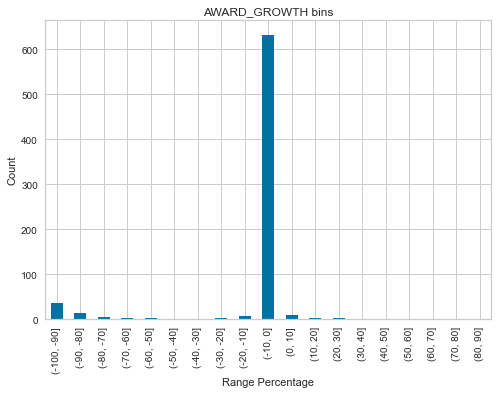

In [55]:
# Bins for AWARD_GROWTH
bins = np.arange(-100, 100, 10)
AWARD_GROWTH_BINS = pd.cut(proc_data['AWARD_GROWTH'], bins)
AWARD_GROWTH_BINS.value_counts(sort=False).plot(kind='bar')
plt.title('AWARD_GROWTH bins')
plt.xlabel('Range Percentage')
plt.ylabel('Count')
plt.show()

In [56]:
# Filter AWARD_GROWTH less than -50 or greater 50
proc_data[(proc_data.AWARD_GROWTH < -50) | (proc_data.AWARD_GROWTH > 50)]

,CONTRACT_ID,ENTITY_NAME,DEPARTMENT,MUNICIPALITY_TYPE,PROCESS_TYPE,CONTRACT_OBJECT,OBJETC_DETAIL,ESTIMATED_COST,CONTRACT_VALUE,ADDITIONAL_COST,FINAL_COST,YEAR,CONTRACT_DATE,START_DATE,ORIGINAL_DEADLINE,END_DATE,ADDITIONAL_TIME,FINAL_DEADLINE,PROJECT_INTENSITY,AWARD_GROWTH,COST_DEVIATION,TIME_DEVIATION,OWNER,REGION
7,15-1-1467833988717,META ALCALDÍA MUNICIPIO DE LEJANÍAS,META,TYPE_6,LICITACIÓN PÚBLICA,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VÍAS",CONSTRUCCIÓN VIAS URBANAS EN EL MUNICIPIO DE L...,1237.055537,86.593125,0.000000,86.593125,2015,2015-10-08,2015-10-23,75,2016-01-06,0,75,1.154575,-93.000062,0.000000,0.000000,MUNICIPALITY,ORINOQUIA
14,15-1-1488875060903,ANTIOQUIA ALCALDÍA MUNICIPIO DE RIONEGRO,ANTIOQUIA,TYPE_2,LICITACIÓN PÚBLICA,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VÍAS",OBRAS DE ESTABILIZACION MITIGACION Y COMPLEMEN...,584.140961,291.983352,0.000000,291.983352,2015,2015-11-09,2015-11-09,60,2016-01-09,0,60,4.866389,-50.014916,0.000000,0.000000,MUNICIPALITY,ANDINA
24,16-1-1618435203605,INSTITUTO NACIONAL DE VÍAS INVIAS,BOGOTÁ D.C.,OTHER,LICITACIÓN PÚBLICA,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VÍAS",MANTENIMIENTO RUTINARIO VIAS A CARGO DEL INSTI...,19053.356627,687.732193,175.698742,863.430935,2016,2016-10-13,2016-11-05,600,2018-12-05,150,750,1.146220,-96.390493,0.255476,0.250000,OTHER,ANDINA
31,16-1-1619755282995,INSTITUTO NACIONAL DE VÍAS INVIAS,BOGOTÁ D.C.,OTHER,LICITACIÓN PÚBLICA,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VÍAS",MANTENIMIENTO RUTINARIO VIAS A CARGO DEL INSTI...,10193.634371,823.676391,211.869397,1035.545788,2016,2016-10-21,2016-11-03,540,2018-10-03,150,690,1.525327,-91.919699,0.257224,0.277778,OTHER,ANDINA
33,17-1-1698356469370,CALDAS GOBERNACIÓN,CALDAS,OTHER,LICITACIÓN PÚBLICA,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VÍAS",MEJORAMIENTO MEDIANTE LA CONSTRUCCIÓN DE HUELL...,4323.755187,477.206591,0.000000,477.206591,2017,2017-06-23,2017-09-18,60,2017-11-18,21,81,7.953443,-88.963145,0.000000,0.350000,DEPARTMENT_GOVERNMENT,ANDINA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,17-1-1698356427467,CALDAS GOBERNACIÓN,CALDAS,OTHER,LICITACIÓN PÚBLICA,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VÍAS",MEJORAMIENTO MEDIANTE LA CONSTRUCCIÓN DE HUELL...,4323.755187,483.186158,0.000000,483.186158,2017,2017-06-23,2017-09-14,60,2017-11-14,20,80,8.053103,-88.824849,0.000000,0.333333,DEPARTMENT_GOVERNMENT,ANDINA
691,17-1-1698356436125,CALDAS GOBERNACIÓN,CALDAS,OTHER,LICITACIÓN PÚBLICA,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VÍAS",MEJORAMIENTO MEDIANTE LA CONSTRUCCIÓN DE HUELL...,4323.755187,595.695614,0.000000,595.695614,2017,2017-06-27,2017-09-15,60,2017-11-15,23,83,9.928260,-86.222726,0.000000,0.383333,DEPARTMENT_GOVERNMENT,ANDINA
707,16-1-1618435203528,INSTITUTO NACIONAL DE VÍAS INVIAS,BOGOTÁ D.C.,OTHER,LICITACIÓN PÚBLICA,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VÍAS",MANTENIMIENTO RUTINARIO VIAS A CARGO DEL INSTI...,19053.356627,738.316731,374.657975,1112.974706,2016,2016-10-13,2016-11-05,600,2019-05-05,301,901,1.230528,-96.125004,0.507449,0.501667,OTHER,ANDINA
710,16-1-1619755289994,INSTITUTO NACIONAL DE VÍAS INVIAS,BOGOTÁ D.C.,OTHER,LICITACIÓN PÚBLICA,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VÍAS",MANTENIMIENTO RUTINARIO VIAS A CARGO DEL INSTI...,10193.634371,826.647466,212.633379,1039.280845,2016,2016-10-21,2016-11-03,540,2018-10-03,150,690,1.530829,-91.890552,0.257224,0.277778,OTHER,ANDINA


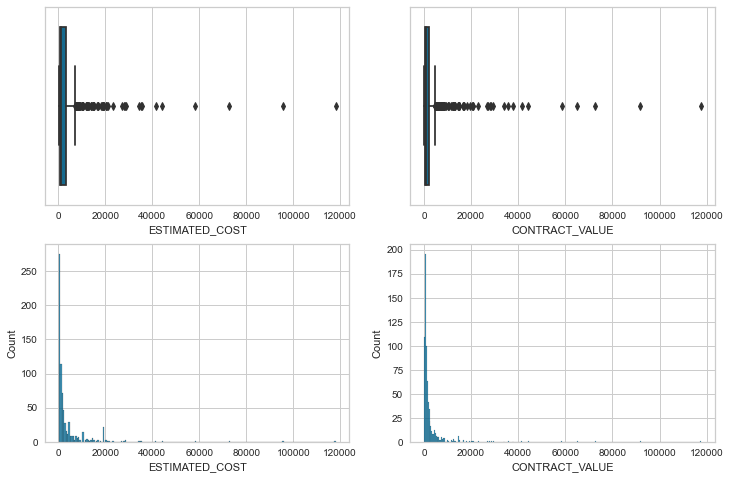

In [57]:
# ESTIMATED_COST and CONTRACT_VALUE distribution with boxplots and histograms
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.boxplot(x='ESTIMATED_COST', data=proc_data, ax=axs[0, 0])
sns.boxplot(x='CONTRACT_VALUE', data=proc_data, ax=axs[0, 1])
sns.histplot(x='ESTIMATED_COST', data=proc_data, ax=axs[1, 0])
sns.histplot(x='CONTRACT_VALUE', data=proc_data, ax=axs[1, 1])
plt.show()

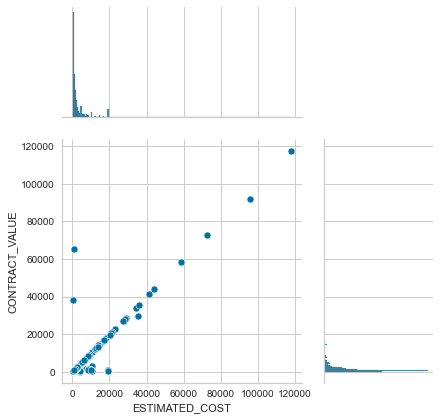

In [58]:
# Relation between ESTIMATED_COST and CONTRACT_VALUE
sns.jointplot(x='ESTIMATED_COST', y='CONTRACT_VALUE',data=proc_data, ratio=2)
plt.show()

#### Plazos, adiciones, fecha de firma y fecha de inicio.

## 2.3 Consolidación de los datos en una tabla maestra (Load)

Todos los datos se consolidan en una tabla maestra, la cual contiene todas las variables transformadas que se utilizaran en el análisis de los datos y el desarrollo de los modelos. Una descripción de los atributos en esta base de datos se presenta a continuación:


<style type="text/css">
.tg  {border-collapse:collapse;border-color:#9ABAD9;border-spacing:0;}
.tg td{background-color:#EBF5FF;border-color:#9ABAD9;border-style:solid;border-width:1px;color:#444;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#409cff;border-color:#9ABAD9;border-style:solid;border-width:1px;color:#fff;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-cly1{text-align:left;vertical-align:middle}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-cly1">Phase</th>
    <th class="tg-cly1">Variable</th>
    <th class="tg-cly1">Type</th>
    <th class="tg-cly1">Description</th>
    <th class="tg-cly1">Unit/Values</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax" rowspan="10"> 			<br>Project initiation  		</td>
    <td class="tg-0lax"> 			<br>Project type 		</td>
    <td class="tg-0lax">Categorical</td>
    <td class="tg-0lax"> 			<br>The main project object.  		</td>
    <td class="tg-0lax"> 			<br>Construction or Maintenance  		</td>
  </tr>
  <tr>
    <td class="tg-0lax">Owner</td>
    <td class="tg-0lax">Categorical</td>
    <td class="tg-0lax">The entity or the stakeholder responsible for contracting the project. </td>
    <td class="tg-0lax">Amazonia, Andina, Caribe, Orinoquia, or Pacifica </td>
  </tr>
  <tr>
    <td class="tg-0lax">Geographic Location/ Region </td>
    <td class="tg-0lax">Categorical</td>
    <td class="tg-0lax">Colombian regions where the project takes place. </td>
    <td class="tg-0lax">Municipality or Other </td>
  </tr>
  <tr>
    <td class="tg-0lax">Municipality Type </td>
    <td class="tg-0lax">Categorical</td>
    <td class="tg-0lax">Class stated by Colombian law. (According to their number of inhabitants and income).</td>
    <td class="tg-0lax">Type 1 to 6, 1 being the highest category </td>
  </tr>
  <tr>
    <td class="tg-0lax">Period/ Year </td>
    <td class="tg-0lax">Categorical</td>
    <td class="tg-0lax">The period of project execution, in this case, was established in years. </td>
    <td class="tg-0lax">Years: 2015, 2016, 2017, or 2018 </td>
  </tr>
  <tr>
    <td class="tg-0lax">Estimated Cost</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">Budgeted construction cost, determined at the time of procurement by the owner. </td>
    <td class="tg-0lax">Minimum salaries </td>
  </tr>
  <tr>
    <td class="tg-0lax">Original Deadline</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">The project planned duration, determined at the time of procurement by the owner.</td>
    <td class="tg-0lax">Days </td>
  </tr>
  <tr>
    <td class="tg-0lax">Project Intensity </td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">The ratio between the estimated cost and the original deadline. </td>
    <td class="tg-0lax">Minimum salaries/days </td>
  </tr>
  <tr>
    <td class="tg-0lax"> 			<br>Time studies contract 		</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax"> 			<br>Number of days between the publication of previous studies and the signing of the contract 		</td>
    <td class="tg-0lax"> </td>
  </tr>
  <tr>
    <td class="tg-0lax">IDI </td>
    <td class="tg-0lax">N/A</td>
    <td class="tg-0lax">“Indice de Desempeño Integral”: calculated to evaluate public management and decision-making in the use of municipal resources for each municipality in Colombia </td>
    <td class="tg-0lax"> </td>
  </tr>
  <tr>
    <td class="tg-0lax" rowspan="21"> 			<br>Project planning  		</td>
    <td class="tg-0lax"> 			<br>Process Type  		</td>
    <td class="tg-0lax">Categorical</td>
    <td class="tg-0lax"> 			<br>Modality chosen for the contractor procurement and selection.  		</td>
    <td class="tg-0lax"> 			<br>Competitive Bidding, Abbreviated Selection, Minimum Contract  Minimum salaries  		</td>
  </tr>
  <tr>
    <td class="tg-0lax">Contractor</td>
    <td class="tg-0lax">Categorical</td>
    <td class="tg-0lax">The stakeholder responsible for executing the project.</td>
    <td class="tg-0lax">Individual, Consortium, or Companies</td>
  </tr>
  <tr>
    <td class="tg-0lax">Contract Value</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">The contract awarded amount. </td>
    <td class="tg-0lax">Minimum salaries </td>
  </tr>
  <tr>
    <td class="tg-0lax">Award Growth </td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">The ratio between the difference of contract value and the estimated cost. </td>
    <td class="tg-0lax">Percentage (%) </td>
  </tr>
  <tr>
    <td class="tg-0lax"> 			<br>Advanced payment 		</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax"> 			<br>Percentage of the initial cost paid before the start of the project  		</td>
    <td class="tg-0lax"> 			<br>Percentage  		</td>
  </tr>
  <tr>
    <td class="tg-0lax">Experience</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">Value of required executed contracts expressed at present value</td>
    <td class="tg-0lax">--</td>
  </tr>
  <tr>
    <td class="tg-0lax">Contracting capacity (K)</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">The bidder's capacity to perform the contract, taking into account other projects under execution. </td>
    <td class="tg-0lax">--</td>
  </tr>
  <tr>
    <td class="tg-0lax"> 			<br>Liquidity index 		</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax"> 			<br>Current assets over current liabilities  		</td>
    <td class="tg-0lax"> 			<br>--  		</td>
  </tr>
  <tr>
    <td class="tg-0lax">Debt index</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">Total liabilities over total assets </td>
    <td class="tg-0lax">-- </td>
  </tr>
  <tr>
    <td class="tg-0lax">Interest coverage ratio</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">Earnings before interest and taxes over interest expense</td>
    <td class="tg-0lax">-- </td>
  </tr>
  <tr>
    <td class="tg-0lax">Return on Equity – ROE</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">Net income by shareholder's equity </td>
    <td class="tg-0lax">-- </td>
  </tr>
  <tr>
    <td class="tg-0lax">Return on Assets – ROA</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">The ratio between net income and the average total assets.</td>
    <td class="tg-0lax"> </td>
  </tr>
  <tr>
    <td class="tg-0lax">Working capital</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">Current Assets – Current Liabilities </td>
    <td class="tg-0lax">Cash </td>
  </tr>
  <tr>
    <td class="tg-0lax">Net equity</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">Total Assets−Total Liabilities </td>
    <td class="tg-0lax">Cash </td>
  </tr>
  <tr>
    <td class="tg-0lax">Number of bidders</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">Number of bidders participating in the hiring process</td>
    <td class="tg-0lax">Number of bidders</td>
  </tr>
  <tr>
    <td class="tg-0lax">Price score</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">The percentage assigned to price in the evaluation </td>
    <td class="tg-0lax">Percentage </td>
  </tr>
  <tr>
    <td class="tg-0lax">Technical score</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">The percentage assigned to technical aspects in the evaluation</td>
    <td class="tg-0lax">Percentage </td>
  </tr>
  <tr>
    <td class="tg-0lax">National industry</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">The percentage assigned to national industry score in the evaluation </td>
    <td class="tg-0lax">Percentage </td>
  </tr>
  <tr>
    <td class="tg-0lax">Other score</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">The percentage assigned to other aspects in the evaluation</td>
    <td class="tg-0lax">Percentage </td>
  </tr>
  <tr>
    <td class="tg-0lax">Lowest category score</td>
    <td class="tg-0lax">Categorical</td>
    <td class="tg-0lax">The category to which the lowest score has been assigned </td>
    <td class="tg-0lax">Price, technical, national industry, other</td>
  </tr>
  <tr>
    <td class="tg-0lax">Higher category score</td>
    <td class="tg-0lax">Categorical</td>
    <td class="tg-0lax">The category to which the highest score has been assigned</td>
    <td class="tg-0lax">Price, technical, national industry, other </td>
  </tr>
  <tr>
    <td class="tg-0lax" rowspan="5"> 			<br>Project execution and closure  		</td>
    <td class="tg-0lax"> 			<br>Additional Cost (Numerical)  		</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax"> 			<br>The difference between the contract value and the final contract cost.  		</td>
    <td class="tg-0lax"> 			<br>Minimum salaries 		</td>
  </tr>
  <tr>
    <td class="tg-0lax">Additional Time (Numerical) </td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">Difference between the original deadline and the final contract deadline.</td>
    <td class="tg-0lax">Days </td>
  </tr>
  <tr>
    <td class="tg-0lax">Final Cost (Numerical)</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">Final contract cost. </td>
    <td class="tg-0lax">Minimum salaries Days </td>
  </tr>
  <tr>
    <td class="tg-0lax">Final Deadline (Numerical) </td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">Final contract deadline. </td>
    <td class="tg-0lax">Days </td>
  </tr>
  <tr>
    <td class="tg-0lax"> 			<br>Time suspended  		</td>
    <td class="tg-0lax">Numerical</td>
    <td class="tg-0lax">Number of days the project was suspended, expressed as a percentage of the initial deadline </td>
    <td class="tg-0lax">Percentage </td>
  </tr>
</tbody>
</table>

In [57]:
# Cargar tabla maestra de datos
master_data = pd.read_excel('data/master_data.xlsx')
# master_data set index from 1 to n
master_data['NUMBER_OF_CONTRACTS'] = [i for i in range(1, len(master_data) + 1)]
# set index NUMBER_OF_CONTRACTS
master_data.set_index('NUMBER_OF_CONTRACTS', inplace=True)
master_data.head()

,COST_DEVIATION,TIME_DEVIATION,TIME_STUDIES_CONTRACT,ADVANCED_PAYMENT,ESTIMATED_COST,ORIGINAL_DEADLINE,LIQUIDITY_INDEX_B,DEBT_INDEX_B,INTEREST_COVERAGE_RATIO_B,ROE_B,...,LOWEST_SCORE,YEAR,IDI_CAT,CONTRACT_TYPE,MUNICIPALITY_TYPE,DEPARTMENT,REGION,REGION_2,OWNER,PERFORMANCE
NUMBER_OF_CONTRACTS,,,,,,,,,,,,,,,,,,,,,
1,0.18,0.50,111.0,0.0,861.08,90,10.0,0.50,1.0,0.05,...,NATIONAL_INDUSTRY,Y_2016,SATISFACTORY,CONSTRUCTION,TYPE_6,MAGDALENA,CARIBE,CARIBE,MUNICIPALITY,BOTH
2,0.25,0.00,38.0,0.0,325.26,90,85.0,0.16,85.0,0.13,...,OTHER,Y_2017,SATISFACTORY,MAINTEINANCE,TYPE_6,BOYACA,ANDINA,CENTRO_ORIENTE,MUNICIPALITY,COST_DEVIATION
3,0.00,0.38,41.0,0.4,1084.43,120,10.0,0.40,10.0,0.15,...,OTHER,Y_2017,OUTSTANDING,MAINTEINANCE,TYPE_6,ANTIOQUIA,ANDINA,EJE_CAFETERO,MUNICIPALITY,TIME_DEVIATION
4,0.00,0.00,47.0,0.0,358.75,60,25.0,0.50,4.0,0.55,...,OTHER,Y_2018,LOW,MAINTEINANCE,TYPE_6,TOLIMA,ANDINA,CENTRO_SUR,MUNICIPALITY,NO_DEVIATION
5,0.00,0.00,35.0,0.0,2020.64,60,250.0,0.15,5.0,0.10,...,NATIONAL_INDUSTRY,Y_2015,SATISFACTORY,MAINTEINANCE,TYPE_6,BOYACA,ANDINA,CENTRO_ORIENTE,MUNICIPALITY,NO_DEVIATION


In [58]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 204
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   COST_DEVIATION             204 non-null    float64
 1   TIME_DEVIATION             204 non-null    float64
 2   TIME_STUDIES_CONTRACT      203 non-null    float64
 3   ADVANCED_PAYMENT           204 non-null    float64
 4   ESTIMATED_COST             204 non-null    float64
 5   ORIGINAL_DEADLINE          204 non-null    int64  
 6   LIQUIDITY_INDEX_B          204 non-null    float64
 7   DEBT_INDEX_B               204 non-null    float64
 8   INTEREST_COVERAGE_RATIO_B  198 non-null    float64
 9   ROE_B                      201 non-null    float64
 10  ROA_B                      201 non-null    float64
 11  WORKING_CAPITAL            95 non-null     float64
 12  NET_EQUITY                 57 non-null     float64
 13  EXPERIENCE_B_VALUE         197 non-null    float64

# 3. DEVELOPMENT OF EXPLORATORY DATA ANALYSIS


## 3.1 Getting data profile (Pandas profiling)

- Análisis de la distribución, gráficos de cajas y análisis de outliers.
- Análisis correlacional con las variables de desviación en tiempo y costo


In [61]:
from pandas_profiling import ProfileReport

In [62]:
profile = ProfileReport(master_data, title="Pandas Profiling Report")

In [63]:
profile.to_file("pandas_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 3.2 Missing data

Regarding the completeness of the data, different requirements of the contracting process were identified that are not mandatory in all the bidding processes. See the next Table where _Net equity_ and _Working capital_ with many missing data were not considered in further analysis. These factors are not requested in all bidding processes.

In [59]:
# count missing values
missing_data = (master_data
                .isnull()
                .sum()
                .sort_values(ascending=False)
                .reset_index()
                .rename(columns={'index': 'Variable', 0: 'Count'})
                .query("Count > 0")
                .assign(Porcentaje=lambda x: np.round(((x.Count / master_data.shape[0]) * 100), 2)))
missing_data

,Variable,Count,Porcentaje
0,NET_EQUITY,147,72.06
1,WORKING_CAPITAL,109,53.43
2,K_CONTRACTING_B_VALUE,9,4.41
3,EXPERIENCE_B_VALUE,7,3.43
4,INTEREST_COVERAGE_RATIO_B,6,2.94
5,ROE_B,3,1.47
6,ROA_B,3,1.47
7,TIME_STUDIES_CONTRACT,1,0.49


## 3.3 Outliers (PCA - Kmeans)


Para identificar los outliers se desarrollaron los siguientes pasos:
- El eliminaron las variables: CONTRACT_VALUE, FINAL_COST, ROA_B, FINAL_DEADLINE, NET_EQUITY, WORKING_CAPITAL (porque?)
- Se quitaron las variables categóricas
- Se eliminaron filas con valores faltanes
- Se hizo un análisis de cluster con el método Kmeans y se identificaron 5 clusters
- Para visualizar los cluster se hizo una anlisis de componentes principales 
- Se identificaron clusters y contratos que se alejan significativamente de la mayoria de contratos

In [60]:
# Eliminar variables con más de un 50% de valores faltantes
master_data.drop(['NET_EQUITY', 'WORKING_CAPITAL'], axis=1, inplace=True)

In [61]:
# fill missing values with median
for i in master_data.columns:
    if master_data[i].isnull().sum() > 0:
        master_data[i].fillna(master_data[i].median(), inplace=True)

In [64]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

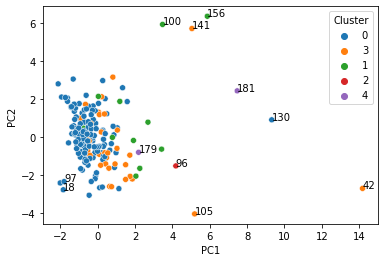

In [65]:
# Create a copy of master_data
master_data_filtered = master_data.copy()

# Delete columns -CONTRACT_VALUE,-FINAL_COST,-ROA_B,-FINAL_DEADLINE,-NET_EQUITY,-WORKING_CAPITAL
master_data_filtered = master_data_filtered.drop(['CONTRACT_VALUE', 'FINAL_COST', 'ROA_B', 'FINAL_DEADLINE'], axis=1)

# Select columns with numeric values
master_data_filtered = master_data_filtered.select_dtypes(include=['number'])

# Delete rows with missing values
master_data_filtered = master_data_filtered.dropna(axis=0)

# cluster with KMeans with data filtered
kmeans = KMeans(n_clusters=5, random_state=0).fit(master_data_filtered)
clusters = kmeans.labels_

pipe_pca = make_pipeline(StandardScaler(), PCA(n_components=2))

# PCA with 2 components
#pca_model = PCA(n_components=2, whiten=True)
pca_data = pipe_pca.fit(master_data_filtered).transform(master_data_filtered)

# convert to pandas dataframe
pca_data = pd.DataFrame(pca_data, columns=['PC1', 'PC2'], index=master_data_filtered.index)
pca_data['Cluster'] = [str(i) for i in clusters]

# plot pca with clusters colors
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_data)

# add text from index
oulier_index = [18, 42, 96, 97, 100, 105, 130, 141, 156, 179, 181]
for i in pca_data.index:
    if i in oulier_index:
        plt.annotate(i, (pca_data.loc[i, 'PC1'], pca_data.loc[i, 'PC2']))
plt.show()

The data profiling reported the presence of outliers. Applying Principal Component Analysis – PCA, complemented with cluster analysis using the K-means method, identified those that correspond to multivariate outliers, considered all the numerical variables. See the last Figure.

In [66]:
# delete rows in outlier_index
master_data = master_data.loc[~master_data.index.isin(oulier_index),].copy()
print(master_data.shape)

(193, 39)


## 3.4 Correlations treatment 

En esta parte se busca identificar las variables independientes que estan altamente correlacionadas utilizando el coeficiente de correlacción de Sperman $\rho$

/var/folders/yb/73r2f0hj06z2_w4y40669q480000gn/T/ipykernel_3606/3156817339.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


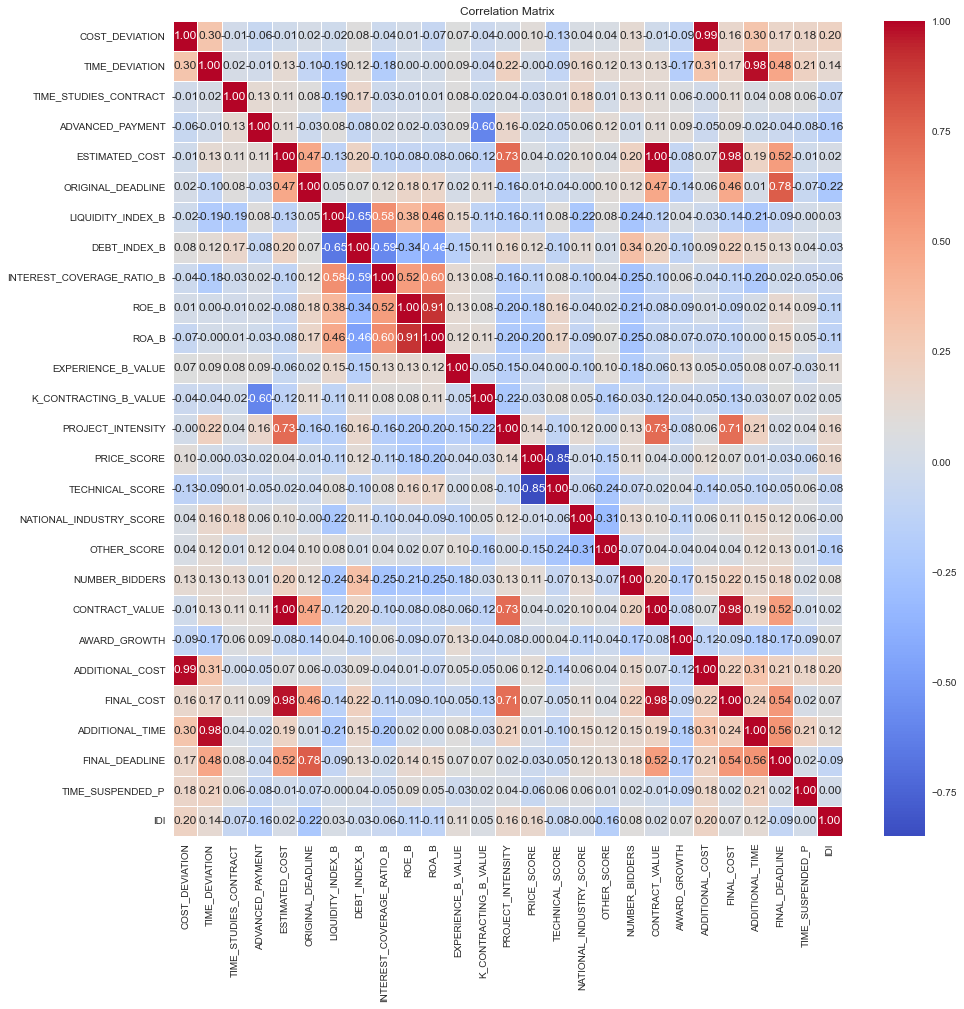

In [80]:
# Matriz de correlación de spearman con las variables numéricas sin COST_DEVIATION and TIME_DEVIATION
#corr_matrix = master_data.drop(columns=['COST_DEVIATION','TIME_DEVIATION']).corr(method='spearman')
corr_matrix = master_data.corr(method='spearman')
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [8]:
500000*4000

2000000000

In [81]:
# Seleccion de variables altamente correlacionadas
#num_cols = master_data.drop(['COST_DEVIATION', 'TIME_DEVIATION'], axis=1).select_dtypes(include=['number']).columns
num_cols = master_data.select_dtypes(include=['number']).columns
correlaciones = []
for i in range(len(num_cols)-1):
    for j in range(i+1, len(num_cols)):
        col_i = num_cols[i]
        col_j = num_cols[j]
        rho, pval = stats.spearmanr(master_data[col_i], master_data[col_j], nan_policy='omit')
        temp = (col_i, col_j, rho, pval)
        correlaciones.append(temp)

correlaciones = pd.DataFrame(correlaciones, columns=['Var1', 'Var2', 'rho', 'p-value'])

In [82]:
threshold = 0.8
correlaciones[correlaciones.rho > threshold].sort_values(by='rho', ascending=False)

,Var1,Var2,rho,p-value
112,ESTIMATED_COST,CONTRACT_VALUE,0.999939,0.000000e+00
20,COST_DEVIATION,ADDITIONAL_COST,0.988625,4.186329e-159
47,TIME_DEVIATION,ADDITIONAL_TIME,0.980463,7.700512e-137
325,CONTRACT_VALUE,FINAL_COST,0.977959,6.876254e-132
115,ESTIMATED_COST,FINAL_COST,0.977585,3.375190e-131
198,ROE_B,ROA_B,0.908206,3.553625e-74


## 3.5 Developing the sample characterization

Se hace una análisis por columna según el tipo de variable:

- Variables númericas: media, desviación, mínimo, máximo, data completeness rate
- Varaibles categóricas: frecuencia y proporción


### 3.5.1 Estadísticas descriptivas para variables numericas

In [83]:
master_data.describe()

,COST_DEVIATION,TIME_DEVIATION,TIME_STUDIES_CONTRACT,ADVANCED_PAYMENT,ESTIMATED_COST,ORIGINAL_DEADLINE,LIQUIDITY_INDEX_B,DEBT_INDEX_B,INTEREST_COVERAGE_RATIO_B,ROE_B,ROA_B,EXPERIENCE_B_VALUE,K_CONTRACTING_B_VALUE,PROJECT_INTENSITY,PRICE_SCORE,TECHNICAL_SCORE,NATIONAL_INDUSTRY_SCORE,OTHER_SCORE,NUMBER_BIDDERS,CONTRACT_VALUE,AWARD_GROWTH,ADDITIONAL_COST,FINAL_COST,ADDITIONAL_TIME,FINAL_DEADLINE,TIME_SUSPENDED_P,IDI
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.078635,0.247073,57.466321,0.108705,1009.246506,106.533679,22.303782,0.478093,24.382383,0.149135,0.122813,2.029000,0.938653,10.082248,0.461606,0.398352,0.091295,0.048798,1.554404,1007.426231,-0.192497,74.889365,1082.315648,22.316062,128.849741,0.316425,70.205026
std,0.151459,0.442295,60.664894,0.189885,996.350032,74.889920,60.909811,1.426379,80.180841,0.130010,0.117612,1.718689,0.467624,8.723773,0.173626,0.180391,0.042191,0.099566,1.799419,994.638256,0.700948,222.270758,1091.643962,38.398115,84.579494,0.722708,13.826041
min,0.000000,0.000000,16.000000,0.000000,237.450000,10.000000,0.620000,0.010000,0.000000,0.000000,0.000000,0.300000,0.250000,2.410000,0.000000,0.000000,0.000000,0.000000,1.000000,237.450000,-6.545600,0.000000,277.640000,0.000000,10.000000,0.000000,34.900000
25%,0.000000,0.000000,40.000000,0.000000,421.220000,75.000000,2.300000,0.200000,3.000000,0.070000,0.050000,1.000000,0.900000,5.100000,0.300000,0.300000,0.100000,0.000000,1.000000,421.130000,-0.061800,0.000000,457.150000,0.000000,90.000000,0.000000,58.820000
50%,0.000000,0.000000,49.000000,0.000000,642.268738,90.000000,5.500000,0.400000,9.820000,0.100000,0.100000,1.480000,1.000000,6.920000,0.500000,0.400000,0.100000,0.000000,1.000000,641.801259,-0.009300,0.000000,669.510000,0.000000,120.000000,0.000000,74.000000
75%,0.060000,0.360000,60.000000,0.200000,1084.430000,120.000000,14.000000,0.500000,20.000000,0.200000,0.150000,2.000000,1.000000,11.160000,0.600000,0.500000,0.100000,0.050000,1.000000,1084.430000,-0.000100,41.130000,1139.820000,30.000000,150.000000,0.340000,81.050000
max,0.500000,3.280000,779.000000,0.500000,5378.164047,900.000000,600.000000,20.000000,1000.000000,1.000000,1.000000,11.170000,5.000000,52.270000,1.000000,0.900000,0.300000,0.500000,16.000000,5377.178864,0.000100,2249.930000,7386.120000,295.000000,900.000000,5.390000,94.500000


/var/folders/yb/73r2f0hj06z2_w4y40669q480000gn/T/ipykernel_3606/852593670.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


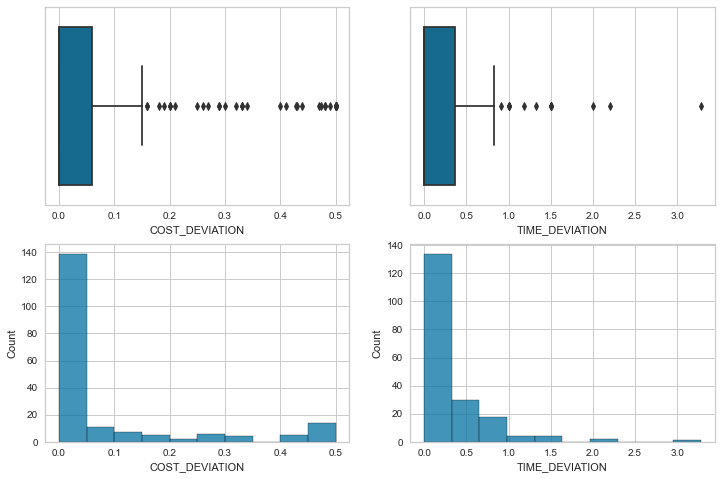

In [84]:
# Dependent variables plot – Competitive bidding projects
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.boxplot(x='COST_DEVIATION', data=master_data, ax=axs[0, 0])
sns.boxplot(x='TIME_DEVIATION', data=master_data, ax=axs[0, 1])
sns.histplot(x='COST_DEVIATION', data=master_data, ax=axs[1, 0], bins=10)
sns.histplot(x='TIME_DEVIATION', data=master_data, ax=axs[1, 1], bins=10)
plt.show()

### 3.5.2 Estadísticas descriptivas para variables categóricas

In [85]:
cat_cols = master_data.select_dtypes(include=['object']).columns
for col in cat_cols:
    sort_col = True
    if col == 'YEAR':
        sort_col = False
    print('-'*50)
    print(col)
    print((master_data[col]
           .value_counts(sort=sort_col)
           .reset_index()
           .rename(columns={'index':col, col:'Count'})
           .assign(Percentage=lambda x: np.round(x['Count']/sum(x['Count'])*100, 2))
          )
         )

--------------------------------------------------
CONTRACTOR
   CONTRACTOR  Count  Percentage
0  CONSORTIUM     77       39.90
1     COMPANY     63       32.64
2  INDIVIDUAL     53       27.46
--------------------------------------------------
HIGHEST SCORE
  HIGHEST SCORE  Count  Percentage
0         PRICE    105       54.40
1     TECHNICAL     72       37.31
2         OTHER     16        8.29
--------------------------------------------------
LOWEST_SCORE
        LOWEST_SCORE  Count  Percentage
0              OTHER    158       81.87
1  NATIONAL_INDUSTRY     35       18.13
--------------------------------------------------
YEAR
     YEAR  Count  Percentage
0  Y_2016     28       14.51
1  Y_2017     49       25.39
2  Y_2018     37       19.17
3  Y_2015     63       32.64
4  Y_2019     16        8.29
--------------------------------------------------
IDI_CAT
        IDI_CAT  Count  Percentage
0  SATISFACTORY     58       30.05
1   OUTSTANDING     58       30.05
2           LOW     49 

/var/folders/yb/73r2f0hj06z2_w4y40669q480000gn/T/ipykernel_3606/550152232.py:40: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


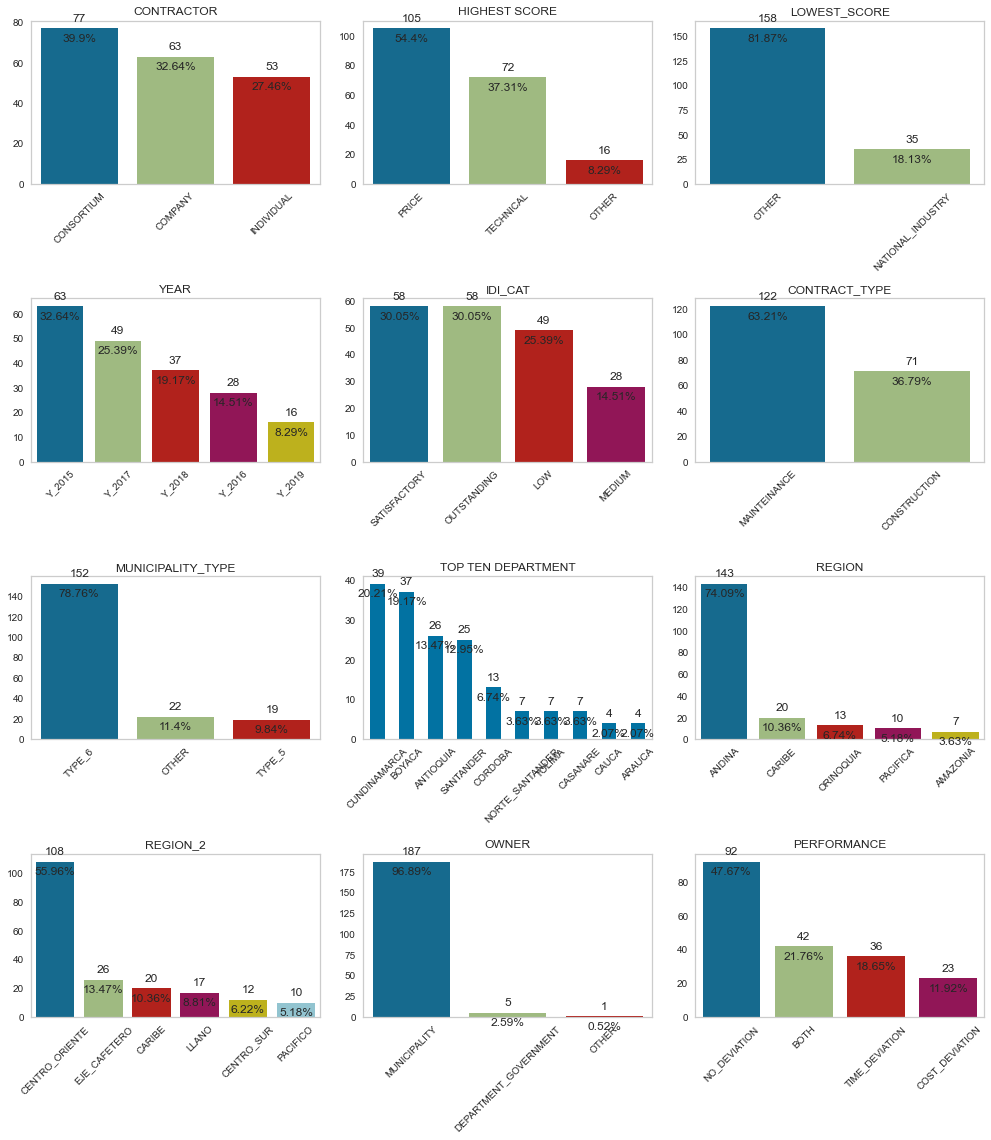

In [86]:
# subplot for categorical values nrows=3, ncols=4
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(14, 16))
for i, col in enumerate(cat_cols):
    if col == 'DEPARTMENT':
        # agregate categories with lower count
        (master_data[col]
        .value_counts(sort=True)
        .head(10)
        .plot(kind='bar', ax=axs[i//3, i%3]))
        axs[i//3, i%3].set_title('TOP TEN ' + col)

    else:
        sns.countplot(x=col, data=master_data, order=master_data[col].value_counts().index, ax=axs[i//3, i%3])
        axs[i//3, i%3].set_title(col)
    
    # add values and percent in barchart
    for p in axs[i//3, i%3].patches:
        axs[i//3, i%3].annotate(
            str(p.get_height()),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 10),
            textcoords='offset points')
        axs[i//3, i%3].annotate(
            str(np.round(p.get_height()/sum(master_data[col].value_counts())*100, 2)) + '%',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, -10),
            textcoords='offset points')
        
    # delete grid
    axs[i//3, i%3].grid(False)
    axs[i//3, i%3].set_xticklabels(axs[i//3, i%3].get_xticklabels(), rotation=45)
    axs[i//3, i%3].set_xlabel('')
    # separete plots for each column
    axs[i//3, i%3].set_ylabel('')
plt.tight_layout()
plt.show()

## 4. IDENTIFICATION OF SIGNIFICANT VARIABLES AND ANALYSIS

- Bivariate analysis (Kruska-Wallis test)
- Multivariate analysis (Machine Learning Models and Logistic Regression)
- Comparing results
- Identifying the need for transforming variables
- Evaluating the interest in obtaining the predictive capacity

### 4.1 Bivariate analysis (Kruska-Wallis test and correlation analysis)


In [87]:
# Variables highly Correlated with COST_DEVIATION
correlaciones[correlaciones.Var1 == 'COST_DEVIATION'].sort_values(by='rho', ascending=False).head(10)

,Var1,Var2,rho,p-value
20,COST_DEVIATION,ADDITIONAL_COST,0.988625,4.186329e-159
0,COST_DEVIATION,TIME_DEVIATION,0.303739,1.753541e-05
22,COST_DEVIATION,ADDITIONAL_TIME,0.299667,2.298110e-05
25,COST_DEVIATION,IDI,0.200277,5.228435e-03
24,COST_DEVIATION,TIME_SUSPENDED_P,0.183035,1.083921e-02
23,COST_DEVIATION,FINAL_DEADLINE,0.171702,1.695778e-02
21,COST_DEVIATION,FINAL_COST,0.155611,3.069881e-02
17,COST_DEVIATION,NUMBER_BIDDERS,0.130639,7.016128e-02
13,COST_DEVIATION,PRICE_SCORE,0.102508,1.560215e-01
6,COST_DEVIATION,DEBT_INDEX_B,0.077673,2.829682e-01


In [88]:
# Variables highly Correlated with TIME_DEVIATION
correlaciones[correlaciones.Var1 == 'TIME_DEVIATION'].sort_values(by='rho', ascending=False).head(10)

,Var1,Var2,rho,p-value
47,TIME_DEVIATION,ADDITIONAL_TIME,0.980463,7.700512e-137
48,TIME_DEVIATION,FINAL_DEADLINE,0.476602,2.446157e-12
45,TIME_DEVIATION,ADDITIONAL_COST,0.306322,1.474063e-05
37,TIME_DEVIATION,PROJECT_INTENSITY,0.215227,2.647872e-03
49,TIME_DEVIATION,TIME_SUSPENDED_P,0.210641,3.278153e-03
46,TIME_DEVIATION,FINAL_COST,0.173184,1.601642e-02
40,TIME_DEVIATION,NATIONAL_INDUSTRY_SCORE,0.156437,2.981263e-02
50,TIME_DEVIATION,IDI,0.136869,5.769200e-02
42,TIME_DEVIATION,NUMBER_BIDDERS,0.128770,7.430290e-02
28,TIME_DEVIATION,ESTIMATED_COST,0.127866,7.637681e-02


In [89]:
# select categorical columns
cat_cols = master_data.select_dtypes(include=['object']).columns
for var in cat_cols:
    print("-"*50)
    print("Estadisticas comparativas por la variable {}".format(var))
    print((master_data
            .loc[master_data.COST_DEVIATION >= 0, [var,"COST_DEVIATION"]]
            .groupby(var)
            .describe()
            .T))

--------------------------------------------------
Estadisticas comparativas por la variable CONTRACTOR
CONTRACTOR              COMPANY  CONSORTIUM  INDIVIDUAL
COST_DEVIATION count  63.000000   77.000000   53.000000
               mean    0.084330    0.060439    0.098302
               std     0.160798    0.130353    0.167673
               min     0.000000    0.000000    0.000000
               25%     0.000000    0.000000    0.000000
               50%     0.000000    0.000000    0.000000
               75%     0.062164    0.020000    0.140000
               max     0.500000    0.500000    0.500000
--------------------------------------------------
Estadisticas comparativas por la variable HIGHEST SCORE
HIGHEST SCORE             OTHER       PRICE  TECHNICAL
COST_DEVIATION count  16.000000  105.000000  72.000000
               mean    0.049021    0.095941   0.059978
               std     0.126673    0.163106   0.136684
               min     0.000000    0.000000   0.000000
          

In [91]:
# Kruskal-Wallis test for all categorical variables
print("Prueba de Kruskal-Wallis para todas las variables categóricas con respecto a la desviación en costo")
y_var = "COST_DEVIATION"
kw_test = []
for x_var in cat_cols:
    temp = [group[y_var].values for name, group in master_data.groupby(x_var)]
    K, p = stats.kruskal(*temp)
    kw_test.append((y_var, x_var, K, p, p < 0.05))
kw_cost = pd.DataFrame(kw_test, columns=['Dependent', 'Independent', 'K', 'p-value', 'Significant'])
kw_cost.sort_values(by='p-value', ascending=True)

Prueba de Kruskal-Wallis para todas las variables categóricas con respecto a la desviación en costo


,Dependent,Independent,K,p-value,Significant
11,COST_DEVIATION,PERFORMANCE,181.690279,3.805695e-39,True
6,COST_DEVIATION,MUNICIPALITY_TYPE,9.897765,7.091328e-03,True
4,COST_DEVIATION,IDI_CAT,7.084074,6.926580e-02,False
8,COST_DEVIATION,REGION,8.514722,7.444223e-02,False
9,COST_DEVIATION,REGION_2,8.072157,1.523035e-01,False
3,COST_DEVIATION,YEAR,6.205798,1.842972e-01,False
7,COST_DEVIATION,DEPARTMENT,27.166615,2.049665e-01,False
5,COST_DEVIATION,CONTRACT_TYPE,1.148639,2.838343e-01,False
1,COST_DEVIATION,HIGHEST SCORE,2.138454,3.432738e-01,False
0,COST_DEVIATION,CONTRACTOR,1.894693,3.877687e-01,False


In [92]:
# Kruskal-Wallis test for all categorical variables
# print("Prueba de Kruskal-Wallis para todas las variables categóricas con respecto a la desviación en costo")
y_var = "TIME_DEVIATION"
kw_test = []
for x_var in cat_cols:
    temp = [group[y_var].values for name, group in master_data.groupby(x_var)]
    K, p = stats.kruskal(*temp)
    kw_test.append((y_var, x_var, K, p, p < 0.05))
kw_cost = pd.DataFrame(kw_test, columns=['Dependent', 'Independent', 'K', 'p-value', 'Significant'])
kw_cost.sort_values(by='p-value', ascending=True)

,Dependent,Independent,K,p-value,Significant
11,TIME_DEVIATION,PERFORMANCE,176.150332,5.980921e-38,True
0,TIME_DEVIATION,CONTRACTOR,5.438850,6.591265e-02,False
4,TIME_DEVIATION,IDI_CAT,7.128348,6.791746e-02,False
10,TIME_DEVIATION,OWNER,3.992297,1.358575e-01,False
6,TIME_DEVIATION,MUNICIPALITY_TYPE,3.499568,1.738115e-01,False
7,TIME_DEVIATION,DEPARTMENT,24.945600,2.996833e-01,False
3,TIME_DEVIATION,YEAR,3.774851,4.373331e-01,False
5,TIME_DEVIATION,CONTRACT_TYPE,0.456596,4.992190e-01,False
2,TIME_DEVIATION,LOWEST_SCORE,0.432099,5.109606e-01,False
8,TIME_DEVIATION,REGION,1.288546,8.633158e-01,False


In [131]:
#master_data.to_csv('data/cleaned_data.csv', index=False)

## 4.2 Multivariate analysis (Machine Learning Models and Logistic Regression)

In [71]:
# Macine learning libraries
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

## 4.2.1 Machine Learning for predicting the cost deviation

In [67]:
del_columns = ['TIME_DEVIATION', 'ADDITIONAL_COST', 'FINAL_COST', 'ADDITIONAL_TIME', 'FINAL_DEADLINE', 'TIME_SUSPENDED_P', 'REGION_2','PERFORMANCE','DEPARTMENT','NUMBER_OF_CONTRACTS']
df_cost_cat = master_data.reset_index().drop(del_columns, axis=1)

In [68]:
# Create X and y = COST_DEVIATION
X = df_cost_cat.drop('COST_DEVIATION', axis=1)
y = [1 if i > 0 else 0 for i in df_cost_cat['COST_DEVIATION']]

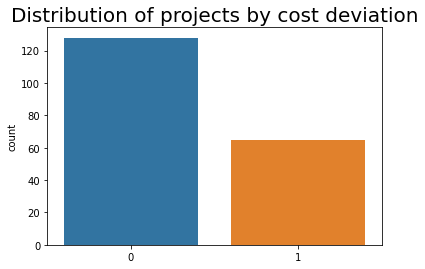

In [69]:
sns.countplot(x=y)
plt.title('Distribution of projects by cost deviation', fontsize=20)
plt.show()

In [72]:
# 1. Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Prepare pipeline
column_transformer = make_column_transformer((StandardScaler(), make_column_selector(dtype_exclude=['object'])),
                                             (OneHotEncoder(), make_column_selector(dtype_include=['object'])),
                                              remainder='passthrough')

# 3. Models
models_estimator = [LogisticRegression(solver='lbfgs', max_iter=1000),
        RidgeClassifier(alpha=0.5),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0, max_features='sqrt'),
        ExtraTreeClassifier(max_depth=5, random_state=0),
        AdaBoostClassifier(n_estimators=100),
        GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1),
        XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1),
        LinearSVC(max_iter=100),
        SVC(kernel='rbf', gamma=0.1, C=10)]
models_names = ['Logistic Regression', 'Ridge', 'Decision Tree', 'Random Forest', 'Extra Tree', 
                'AdaBoost', 'Gradient Boosting', 'Xgboost', 'Linear SVC', 'SVC']

scores_models = []
for model, name in zip(models_estimator, models_names):
    pipe_model = make_pipeline(column_transformer, model)
    pipe_model.fit(X_train, y_train)
    predictions = pipe_model.predict(X_test)
    scores_models.append((name, accuracy_score(y_test, predictions), roc_auc_score(y_test, predictions),
                          precision_score(y_test, predictions), recall_score(y_test, predictions), 
                          f1_score(y_test, predictions)))

# Create a dataframe with the scores
scores_df = pd.DataFrame(scores_models, columns=['Model', 'Accuracy', 'ROC_AUC','Precision', 'Recall', 'F1 Score'])
scores_df.sort_values(by=['F1 Score'], ascending=False, inplace=True)
scores_df

/Users/hfelizzola/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Model,Accuracy,ROC_AUC,Precision,Recall,F1 Score
5,AdaBoost,0.672414,0.638393,0.428571,0.5625,0.486486
9,SVC,0.741379,0.647321,0.538462,0.4375,0.482759
8,Linear SVC,0.689655,0.630952,0.444444,0.5000,0.470588
6,Gradient Boosting,0.637931,0.595238,0.380952,0.5000,0.432432
1,Ridge,0.672414,0.599702,0.411765,0.4375,0.424242
3,Random Forest,0.706897,0.604167,0.461538,0.3750,0.413793
2,Decision Tree,0.655172,0.568452,0.375000,0.3750,0.375000
7,Xgboost,0.586207,0.520833,0.300000,0.3750,0.333333
0,Logistic Regression,0.637931,0.537202,0.333333,0.3125,0.322581
4,Extra Tree,0.551724,0.477679,0.250000,0.3125,0.277778


#### Visualization the validation for the Random Forest

In [73]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, PrecisionRecallCurve

In [74]:
# Scaler X 
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num_cols])
X_scaled = pd.DataFrame(X_scaled, columns=num_cols)
# OneHotEncoder X
cat_cols = X.select_dtypes(include=['object']).columns
X_cat_encoded = pd.get_dummies(X[cat_cols])
# Concatenate X
X_prep = pd.concat([X_scaled, X_cat_encoded], axis=1)

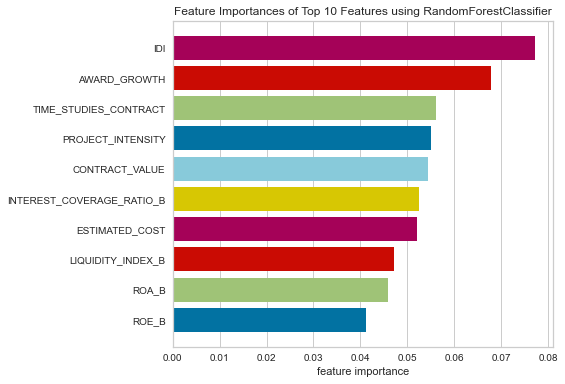

<AxesSubplot:title={'center':'Feature Importances of Top 10 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [75]:
# AdaBoost
model =  RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0, max_features='sqrt')
viz = FeatureImportances(model, orient='h', topn=10, relative=False)
viz.fit(X_prep, y)
viz.show()

#### Logistic Regression Analysis for cost deviation

In [76]:
import statsmodels.api as sm

In [77]:
# Select columns
col_sel = ['OTHER_SCORE',
           'DEBT_INDEX_B',
           'IDI',
           'LIQUIDITY_INDEX_B',
           'ROE_B', 
           #'ROA_B',
           'MUNICIPALITY_TYPE',
           'ADVANCED_PAYMENT',
           'CONTRACTOR','YEAR',
           'EXPERIENCE_B_VALUE',
           'NUMBER_BIDDERS',
           'HIGHEST SCORE',
           'LOWEST_SCORE',
           'ESTIMATED_COST',
           'AWARD_GROWTH']
X_prep = X[col_sel].copy()
X_prep['ONE_BIDDER'] = X_prep['NUMBER_BIDDERS'] <= 1
X_prep['ONE_BIDDER'] = X_prep['ONE_BIDDER'].astype(int)
X_prep.drop('NUMBER_BIDDERS', axis=1, inplace=True)
X_prep['LOG_ESTIMATED_COST'] = np.log(X_prep['ESTIMATED_COST'])
X_prep.drop('ESTIMATED_COST', axis=1, inplace=True)
X_prep = pd.get_dummies(X_prep, drop_first=True)

In [78]:
# Logistic Regression
X_prep = sm.add_constant(X_prep)
logit_mod_cost = sm.Logit(y, X_prep)
logit_res_cost = logit_mod_cost.fit()
print(logit_res_cost.summary())

Optimization terminated successfully.
         Current function value: 0.562728
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  193
Model:                          Logit   Df Residuals:                      171
Method:                           MLE   Df Model:                           21
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                  0.1192
Time:                        14:02:08   Log-Likelihood:                -108.61
converged:                       True   LL-Null:                       -123.30
Covariance Type:            nonrobust   LLR p-value:                    0.1048
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.8577      2.928     -2.342      0.019     -12.597

## 4.2.2 Machine Learning for predicting the time deviation

In [79]:
del_columns = ['COST_DEVIATION', 'ADDITIONAL_COST', 'FINAL_COST', 'ADDITIONAL_TIME', 'FINAL_DEADLINE', 'TIME_SUSPENDED_P', 'REGION_2','PERFORMANCE','DEPARTMENT','NUMBER_OF_CONTRACTS']
df_time_cat = master_data.reset_index().drop(del_columns, axis=1)

In [80]:
# Create X and y = TIME_DEVIATION
X = df_time_cat.drop('TIME_DEVIATION', axis=1)
y = [1 if i > 0 else 0 for i in df_time_cat['TIME_DEVIATION']]

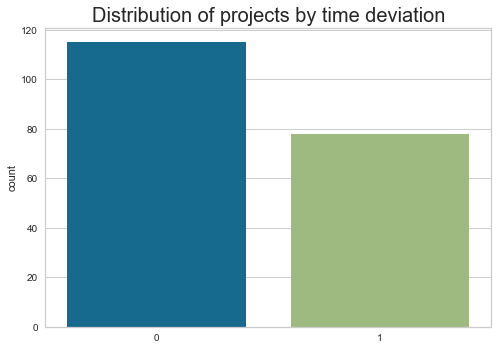

In [81]:
sns.countplot(x=y)
plt.title('Distribution of projects by time deviation', fontsize=20)
plt.show()

In [82]:
# 1. Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Prepare pipeline
column_transformer = make_column_transformer((StandardScaler(), make_column_selector(dtype_exclude=['object'])),
                                             (OneHotEncoder(), make_column_selector(dtype_include=['object'])),
                                              remainder='passthrough')

# 3. Models
models_estimator = [LogisticRegression(solver='lbfgs', max_iter=1000),
        RidgeClassifier(alpha=0.5),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0, max_features='sqrt'),
        ExtraTreeClassifier(max_depth=5, random_state=0),
        AdaBoostClassifier(n_estimators=100),
        GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1),
        XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1),
        LinearSVC(max_iter=100),
        SVC(kernel='rbf', gamma=0.1, C=10)]
models_names = ['Logistic Regression', 'Ridge', 'Decision Tree', 'Random Forest', 'Extra Tree', 
                'AdaBoost', 'Gradient Boosting', 'Xgboost', 'Linear SVC', 'SVC']

scores_models = []
for model, name in zip(models_estimator, models_names):
    pipe_model = make_pipeline(column_transformer, model)
    pipe_model.fit(X_train, y_train)
    predictions = pipe_model.predict(X_test)
    scores_models.append((name, accuracy_score(y_test, predictions), roc_auc_score(y_test, predictions),
                          precision_score(y_test, predictions), recall_score(y_test, predictions), 
                          f1_score(y_test, predictions)))

# Create a dataframe with the scores
scores_df = pd.DataFrame(scores_models, columns=['Model', 'Accuracy', 'ROC_AUC','Precision', 'Recall', 'F1 Score'])
scores_df.sort_values(by=['F1 Score'], ascending=False, inplace=True)
scores_df

/Users/hfelizzola/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Model,Accuracy,ROC_AUC,Precision,Recall,F1 Score
5,AdaBoost,0.655172,0.625000,0.550000,0.500000,0.523810
9,SVC,0.637931,0.611111,0.523810,0.500000,0.511628
6,Gradient Boosting,0.620690,0.588384,0.500000,0.454545,0.476190
3,Random Forest,0.586207,0.551768,0.450000,0.409091,0.428571
8,Linear SVC,0.482759,0.486111,0.366667,0.500000,0.423077
7,Xgboost,0.568966,0.537879,0.428571,0.409091,0.418605
2,Decision Tree,0.603448,0.556818,0.470588,0.363636,0.410256
0,Logistic Regression,0.551724,0.523990,0.409091,0.409091,0.409091
1,Ridge,0.517241,0.496212,0.375000,0.409091,0.391304
4,Extra Tree,0.586207,0.516414,0.416667,0.227273,0.294118


#### Visualization the validation for the Random Forest

In [83]:
# Scaler X 
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num_cols])
X_scaled = pd.DataFrame(X_scaled, columns=num_cols)
# OneHotEncoder X
cat_cols = X.select_dtypes(include=['object']).columns
X_cat_encoded = pd.get_dummies(X[cat_cols])
# Concatenate X
X_prep = pd.concat([X_scaled, X_cat_encoded], axis=1)

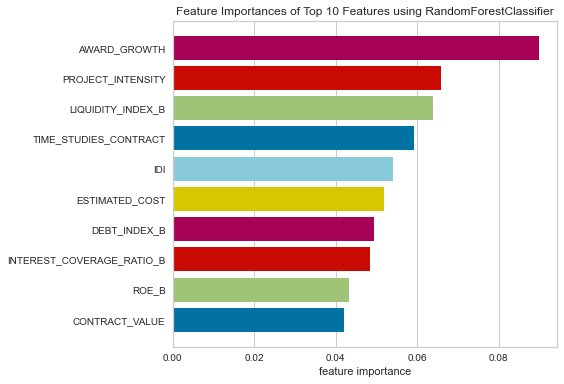

<AxesSubplot:title={'center':'Feature Importances of Top 10 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [84]:
# AdaBoost
model =  RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0, max_features='sqrt')
viz = FeatureImportances(model, orient='h', topn=10, relative=False)
viz.fit(X_prep, y)
viz.show()

#### Logistic Regression Analysis for cost deviation

In [156]:
import statsmodels.api as sm

In [85]:
# Select columns
col_sel = ['OTHER_SCORE',
           'DEBT_INDEX_B',
           'IDI',
           'LIQUIDITY_INDEX_B',
           #'ROE_B', 
           'ROA_B',
           'MUNICIPALITY_TYPE',
           'ADVANCED_PAYMENT',
           'CONTRACTOR',
           'YEAR',
           'EXPERIENCE_B_VALUE',
           'NUMBER_BIDDERS',
           'HIGHEST SCORE',
           'LOWEST_SCORE',
           'ESTIMATED_COST',
           'AWARD_GROWTH']
X_prep = X[col_sel].copy()
X_prep['ONE_BIDDER'] = X_prep['NUMBER_BIDDERS'] <= 1
X_prep['ONE_BIDDER'] = X_prep['ONE_BIDDER'].astype(int)
X_prep.drop('NUMBER_BIDDERS', axis=1, inplace=True)
X_prep['LOG_ESTIMATED_COST'] = np.log(X_prep['ESTIMATED_COST'])
X_prep.drop('ESTIMATED_COST', axis=1, inplace=True)
X_prep = pd.get_dummies(X_prep, drop_first=True)

In [86]:
# Logistic Regression
X_prep = sm.add_constant(X_prep)
logit_mod_cost = sm.Logit(y, X_prep)
logit_res_cost = logit_mod_cost.fit()
print(logit_res_cost.summary())

Optimization terminated successfully.
         Current function value: 0.597018
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  193
Model:                          Logit   Df Residuals:                      171
Method:                           MLE   Df Model:                           21
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                  0.1151
Time:                        14:05:06   Log-Likelihood:                -115.22
converged:                       True   LL-Null:                       -130.21
Covariance Type:            nonrobust   LLR p-value:                   0.09262
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -7.6103      2.865     -2.656      0.008     -13.226